In [7]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/ch1_sport_test.csv', index_col='학생번호')
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [4]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [5]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [8]:
score = np.array(df['english'])[:10]
score

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [10]:
score_df = pd.DataFrame({'score': score}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J']))
score_df

,score
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65
J,58


In [12]:
score_df.mean()

score    55.0
dtype: float64

In [14]:
sorted_score = np.sort(score)
sorted_score

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [18]:
n = len(sorted_score)
if n % 2 == 0:
    m0 = sorted_score[n//2-1]
    m1 = sorted_score[n//2]
    median = (m0+m1)/2
else:
    median = sorted_score[(n+1)//2-1]
    
median

56.5

In [19]:
pd.Series([1,1,1,2,2,2,3]).mode()

0    1
1    2
dtype: int64

In [21]:
mean = np.mean(score)
deviation = score - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [24]:
summary_df = score_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0
J,58,3.0


In [26]:
summary_df['square of deviation'] = summary_df['deviation']**2
summary_df

,score,deviation,square of deviation
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0
J,58,3.0,9.0


In [27]:
np.sqrt(np.var(score, ddof=0))

9.273618495495704

In [28]:
np.std(score, ddof=0)

9.273618495495704

In [30]:
z = (score-np.mean(score))/np.std(score)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [32]:
score_df['deviation value'] = 50 + 10*z
score_df

,score,deviation value
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277
J,58,53.234983


In [33]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [50]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [53]:
freq_class = [f'{i}' for i in range(0, 100, 10)]

In [42]:
class_value = [i+(i+10)//2 for i in range(0,100,10)]
class_value

[5, 20, 35, 50, 65, 80, 95, 110, 125, 140]

In [45]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [46]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [55]:
freq_dist_df = pd.DataFrame({'frequency': freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0,0
10,0
20,0
30,2
40,8
50,16
60,18
70,6
80,0


In [58]:
freq_dist_df['class_value'] = class_value
freq_dist_df['rel_freq'] = rel_freq
freq_dist_df['cum_rel_freq'] = cum_rel_freq
freq_dist_df

,frequency,class_value,rel_freq,cum_rel_freq
class,,,,
0,0,5,0.00,0.00
10,0,20,0.00,0.00
20,0,35,0.00,0.00
30,2,50,0.04,0.04
40,8,65,0.16,0.20
50,16,80,0.32,0.52
60,18,95,0.36,0.88
70,6,110,0.12,1.00
80,0,125,0.00,1.00


In [60]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class_value']

95

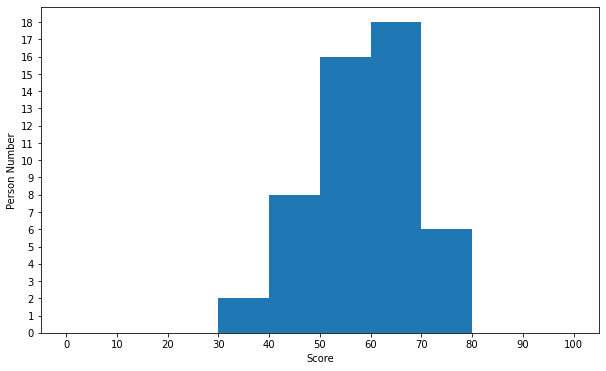

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))

ax.set_xlabel('Score')
ax.set_ylabel('Person Number')

ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

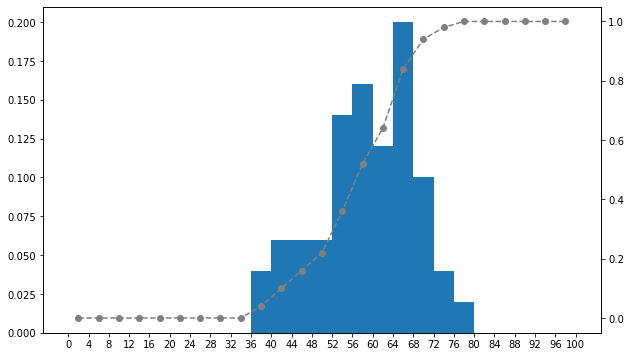

In [76]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores)/len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

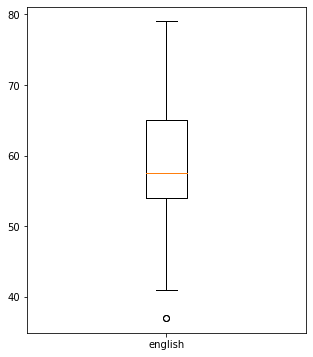

In [80]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()

In [83]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores, 'mathematics': ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [84]:
scores_df.mean()

english        55.0
mathematics    71.4
dtype: float64

In [85]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [86]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

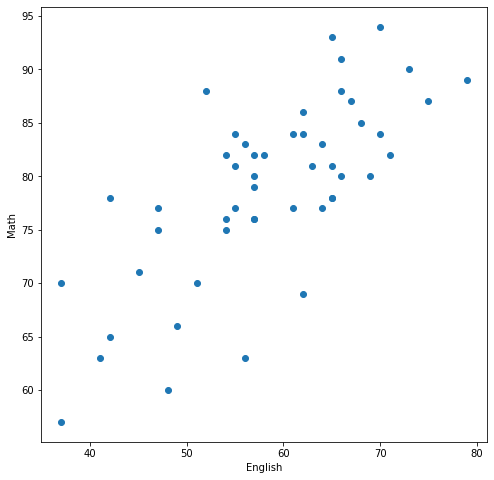

In [96]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores, label='Score')
ax.set_xlabel('English')
ax.set_ylabel('Math')
plt.show()

In [100]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_fit

array([ 0.62142302, 42.60132433])

In [109]:
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 0.62142302, 42.60132433])

In [110]:
xs = np.linspace(english_scores.min(), english_scores.max())
xs

array([37.        , 37.85714286, 38.71428571, 39.57142857, 40.42857143,
       41.28571429, 42.14285714, 43.        , 43.85714286, 44.71428571,
       45.57142857, 46.42857143, 47.28571429, 48.14285714, 49.        ,
       49.85714286, 50.71428571, 51.57142857, 52.42857143, 53.28571429,
       54.14285714, 55.        , 55.85714286, 56.71428571, 57.57142857,
       58.42857143, 59.28571429, 60.14285714, 61.        , 61.85714286,
       62.71428571, 63.57142857, 64.42857143, 65.28571429, 66.14285714,
       67.        , 67.85714286, 68.71428571, 69.57142857, 70.42857143,
       71.28571429, 72.14285714, 73.        , 73.85714286, 74.71428571,
       75.57142857, 76.42857143, 77.28571429, 78.14285714, 79.        ])

In [111]:
ys = poly_1d(xs)
ys

array([65.59397592, 66.12662422, 66.65927252, 67.19192082, 67.72456912,
       68.25721742, 68.78986572, 69.32251401, 69.85516231, 70.38781061,
       70.92045891, 71.45310721, 71.98575551, 72.51840381, 73.05105211,
       73.58370041, 74.11634871, 74.64899701, 75.18164531, 75.71429361,
       76.24694191, 76.77959021, 77.31223851, 77.8448868 , 78.3775351 ,
       78.9101834 , 79.4428317 , 79.97548   , 80.5081283 , 81.0407766 ,
       81.5734249 , 82.1060732 , 82.6387215 , 83.1713698 , 83.7040181 ,
       84.2366664 , 84.7693147 , 85.301963  , 85.8346113 , 86.3672596 ,
       86.89990789, 87.43255619, 87.96520449, 88.49785279, 89.03050109,
       89.56314939, 90.09579769, 90.62844599, 91.16109429, 91.69374259])

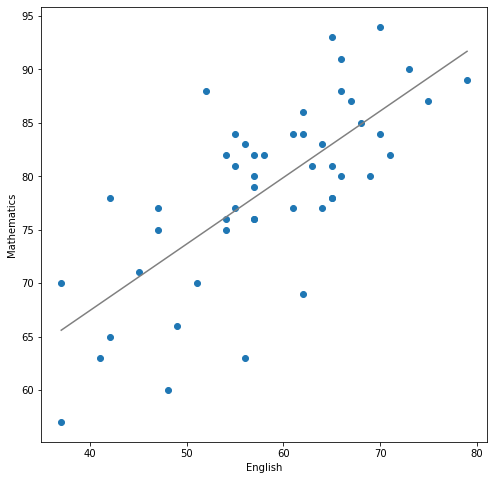

In [116]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='Scores')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]: 2f}x')
ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
plt.show()

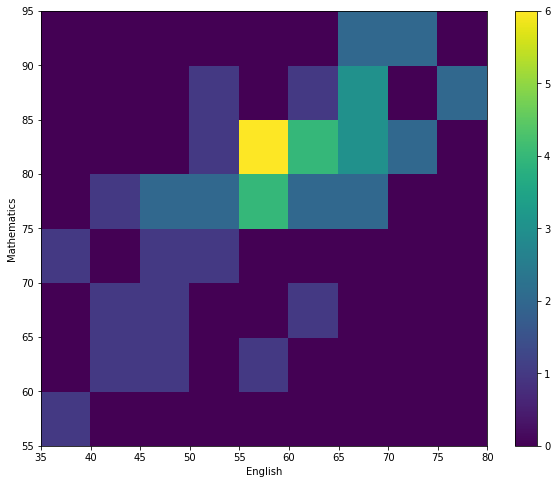

In [118]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c =  ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80), (55,95)])

ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3], ax=ax)

plt.show()

In [123]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
anscombe_data[0]

array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [130]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance','Y_mean','Y_variance', 'X&Y_correlation', 'X&Y_regression line'])

for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                              f'{np.var(dataX):.2f}',
                              f'{np.mean(dataY):.2f}',
                              f'{np.var(dataY):.2f}',
                              f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
                              f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
        
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


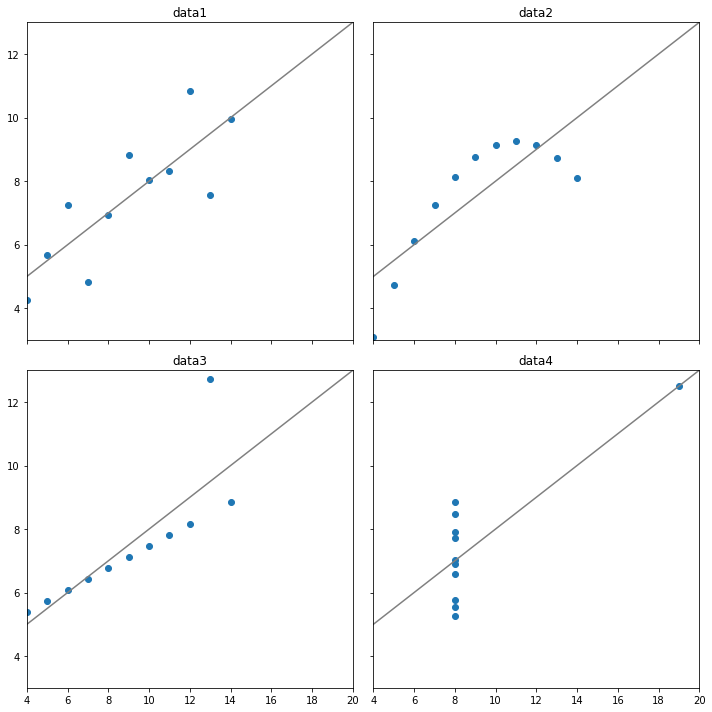

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)

xs = np.linspace(0,30,100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')
    
plt.tight_layout()
plt.show()